# <div style="text-align:center;"><span style="font-size:36px;">  Plotting of BLTrackfile format (multiple 2D table type data)</span></div>

<div style="text-align:center;">
The file (from Fluka) has the format of
<br> !BLTrackfile 
<br> !x y z Px Py Pz t PDGid EvNum TrkId Parent weight
<br> !cm cm cm GeV/c GeV/c GeV/c ns - - - - -
    
<div style="text-align:center;">This notebook set a structure of a plotting generator for any multiple table like data  </div>

In [1]:
# import lib from others
import numpy as np
import pandas as pd
import matplotlib as mpl

# import my lib
from function_packages import *

# Load files

In [2]:
# Specify the path to your directory 
data_path = './data'
# load data with function
data, file_names = load_raw_data(data_path) # here file_names means the name of the files (name_of_files)

 
loading "./data/piplus_in_dt_noB.txt" ...
This file has 361568 number of pions
 loaded "./data/piplus_in_dt_noB.txt" ..., it took:0s
 
loading "./data/piplus_in_dt_B.txt" ...
This file has 526595 number of pions
 loaded "./data/piplus_in_dt_B.txt" ..., it took:0s

 merging all files
The data is in numpy format and with the shape of (files, row, column) (2, 361568, 12)
Renamed file name:  piplus_in_dt_noB.txt  --->  f0
Renamed file name:  piplus_in_dt_B.txt  --->  f1


In [3]:
# or you can rename the file name here (make sure it can be writen as a file name):
file_names = ['wo horn ', 'w horn ']

In [4]:
# edit your column name of the data 
namelist = ['x', 'y', 'z', 'Px', 'Py', 'Pz', 't', 'PDGid', 'EventID', 'TrackID', 'ParentID', 'Weight']

# Just use pandas to show the data structure but not use it for processing and plotting
all_data_pd = [pd.DataFrame(d, columns=namelist) for d in data]
all_data_pd[0]

,x,y,z,Px,Py,Pz,t,PDGid,EventID,TrackID,ParentID,Weight
0,-127.486000,32.34612,300.0,-0.298196,0.074792,0.663874,0.0,211.0,0.0,0.0,0.0,0.0
1,-166.355400,-69.44154,300.0,-0.147948,-0.065918,0.245474,0.0,211.0,0.0,0.0,0.0,0.0
2,-34.278720,135.25840,300.0,-0.027674,0.093798,0.193567,0.0,211.0,0.0,0.0,0.0,0.0
3,-82.095440,-132.17820,300.0,-0.124428,-0.201691,0.426543,0.0,211.0,0.0,0.0,0.0,0.0
4,48.297060,130.91880,300.0,0.022006,0.041782,0.105618,0.0,211.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
361563,0.181605,-32.27297,300.0,-0.002491,-0.054993,0.511936,0.0,211.0,0.0,0.0,0.0,0.0
361564,24.179710,115.86970,300.0,0.032819,0.153860,0.382414,0.0,211.0,0.0,0.0,0.0,0.0
361565,-6.827818,-58.86707,300.0,0.099899,-0.043736,0.388099,0.0,211.0,0.0,0.0,0.0,0.0
361566,78.794780,103.27040,300.0,0.112683,0.150476,0.416767,0.0,211.0,0.0,0.0,0.0,0.0


# Data processing and selection

## Data processing

In [5]:
# if you need to create new columns from the old one, do it here.
## Define variable and constant that I need to change the data.
r_maxmax = 30 # cm
theta_maxmax = 60e-3 # rad
emittance = r_maxmax*1e-2*theta_maxmax/1e-3
print( "(Max) Emittance cut  is ", emittance, "mmrad")
    
# I used a function to help me, open the function and modify it the way you want
all_data = changing_data(data, r_maxmax, theta_maxmax)

(Max) Emittance cut  is  18.0 mmrad

 Change the data columns into ['x', 'y', 'r', 'emission_angle', 'Px', 'Py', 'Pz', 'P', 'PDGid', 'emission_angle_max']


/Users/tinch167/Box Sync/PhD/2_courses/University courses/3_Advanced_Scientific_Programming_with_Python/project_Ting/function_packages/data_processing_selection.py:48: RuntimeWarning: invalid value encountered in sqrt
  emission_angle_max[i] = theta_maxmax * np.sqrt( 1-(r[i]/r_maxmax)**2 ) # this column is transitional , set the maxiumn emission angle for each r


In [6]:
# create variables/ or really just naming the column so that the code is less messy below, that's way I don't use panda below
variable_names = ['x', 'y', 'r', 'emission_angle', 'Px', 'Py', 'Pz', 'P', 'PDGid', 'emission_angle_max'] # define your quantities
for i, name in enumerate(variable_names):
    globals()[name] = all_data[:,:,i]  # You can assign any value here
print("Each column has the shape (files, row): ", P.shape)

Each column has the shape (files, row):  (2, 361568)


## Data selection (using numpy, because I found doing panda_data['column'] is quite messy)

In [7]:
# preparing for data selection, performing a cut and generate selected data

## low level selection
### select pdgid
particles_pdgid = [12, -13, -14, 211, -211] 
### transform pdgid to some familiar names
particle_variables = ['nu_e', 'mu_plus', 'nu_mu_bar','pion_plus', 'pion_minus'] 
for i, name in enumerate(particle_variables):
    globals()[name] = PDGid == particles_pdgid[i]   # all_data[:,:,8] is PDGid

## higher level selection 
pion720880 = ((P>720)&(P<880))
emit_r_theta = ( (emission_angle < emission_angle_max)  )

## make all selections into a list
cut_list = [pion_plus, pion720880, emit_r_theta]
cut_name_list = [r'$\pi^+$ ',r'720<P<880', r'emit_r_$\theta$'] # create a name list for plotting

In [8]:
# create new columns for the selected data
## using a function to help
All_data_s_c = generate_selected_data(all_data, cut_list)
## create variables/ or really just naming the new columns 
cut_variable_names = ['x_s_c', 'y_s_c', 'r_s_c', 'emission_angle_s_c', 'Px_s_c', 'Py_s_c', 'Pz_s_c', 'P_s_c', 'PDGid_s_c']
for  i, name in enumerate(cut_variable_names): 
    globals()[name] = All_data_s_c[i] # for clear variable

In [9]:
# Now you can use the data by each physics quality , i.e.: x_s_c[cut][number of file]
print('Each physics quantity has ', len(x_s_c), 'cuts and ', len(x_s_c[0]), "files.","\nEach files with a cut has ", x_s_c[0][0].shape, "rows.")

Each physics quantity has  3 cuts and  2 files. 
Each files with a cut has  (361568,) rows.


# Plotting

In [10]:
mpl.rcParams['font.size'] = 16 # define the text size in all plots
plt.rcParams['figure.facecolor'] = 'white' 
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','pink','brown','olive','orange', 'purple'] # define colors for multiple lines

image_path = './plots/'
if not os.path.exists(image_path):
    # If it doesn't exist, create it
    os.makedirs(image_path)

## 1D plotting

Take one column and plot histogram, the functions using here are bin_gen_1D and plotting_1D_hist. 

### Momentum distribution

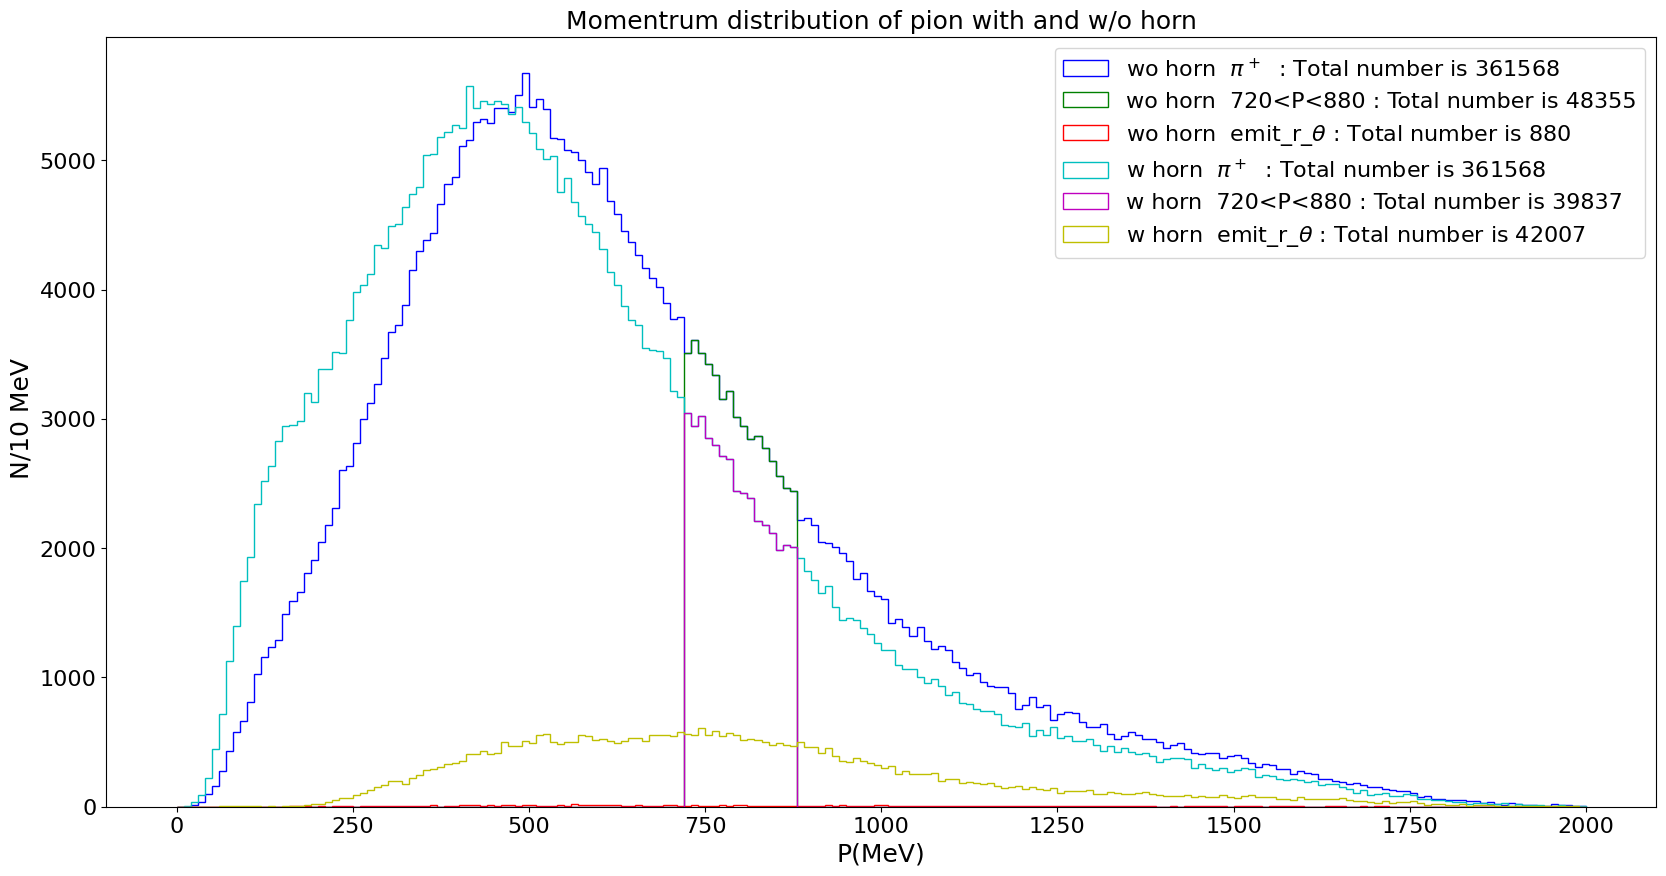

In [11]:
# generate histogram binning
bin_min, bin_max, bin_width = 0, 2000, 10
bin_P = bin_gen_1D(bin_min, bin_max, bin_width)

# plotting parameters
figsize = (20,10)
xlabel = 'P(MeV)'
ylabel = f' N/{bin_width} MeV'
title = 'Momentrum distribution of pion with and w/o horn'
save_name = image_path +f'{data.shape[1]}_pion_momentum_dis.png' # the name of the image if you save it.
fit = 0 # no confidence level fitting

#
plotting_1D_hist(P_s_c, bin_P, figsize, xlabel, ylabel, save_name, title, 
                 colors, fit, file_names, cut_name_list, save=True)

### Emission angle distribution

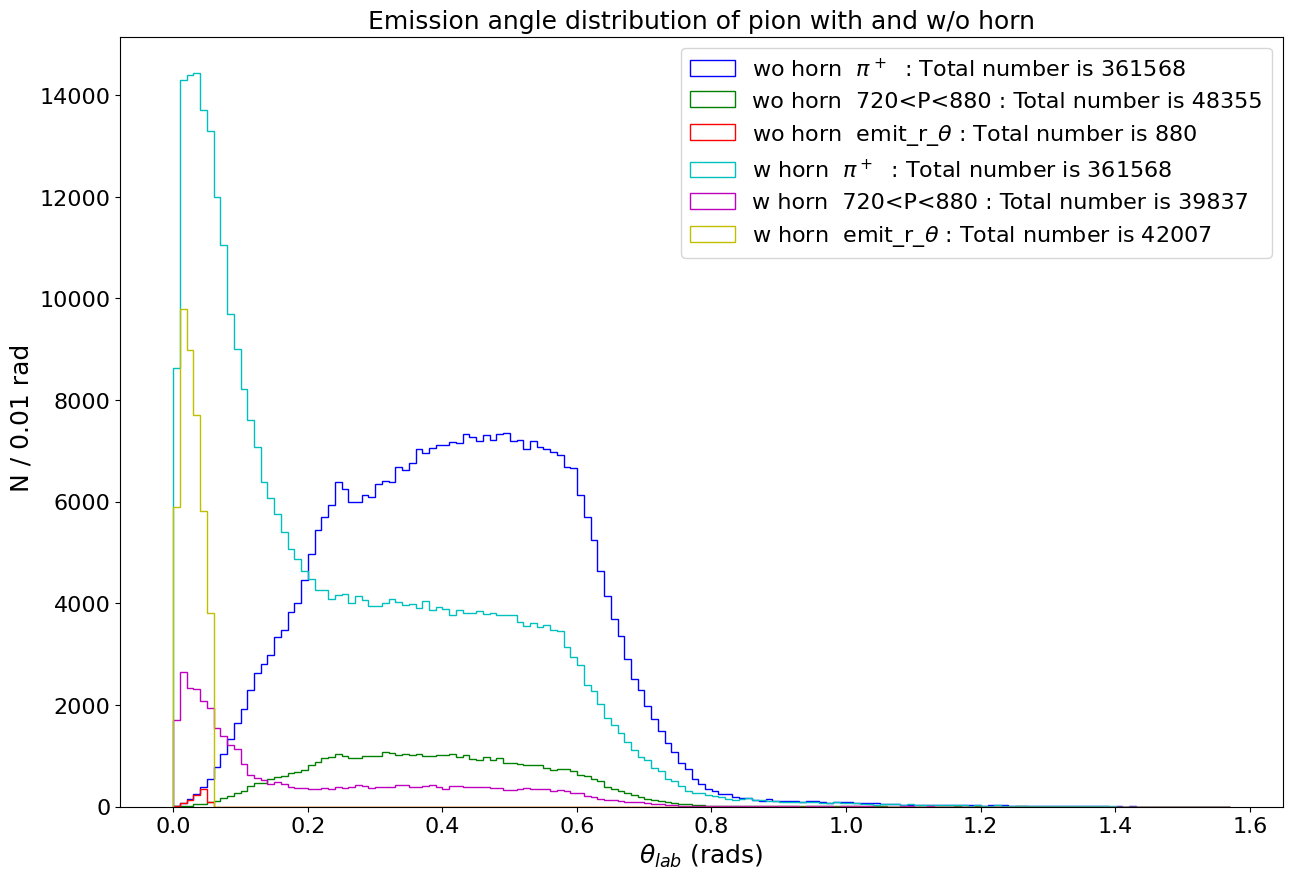

In [12]:
bin_width = 0.01
bin_theta = bin_gen_1D(0, np.pi/2, bin_width)
  
figsize = (15,10)
xlabel = fr'$\theta_{{lab}}$ (rads)'
ylabel = fr' N / {bin_width} rad'
title = 'Emission angle distribution of pion with and w/o horn'
save_name = image_path +f'pion_emission_angle_dis.png'
fit = 0 #

plotting_1D_hist(emission_angle_s_c, bin_theta, figsize, xlabel, ylabel, save_name, title, 
                 colors, fit, file_names, cut_name_list)

### x distribution with fit

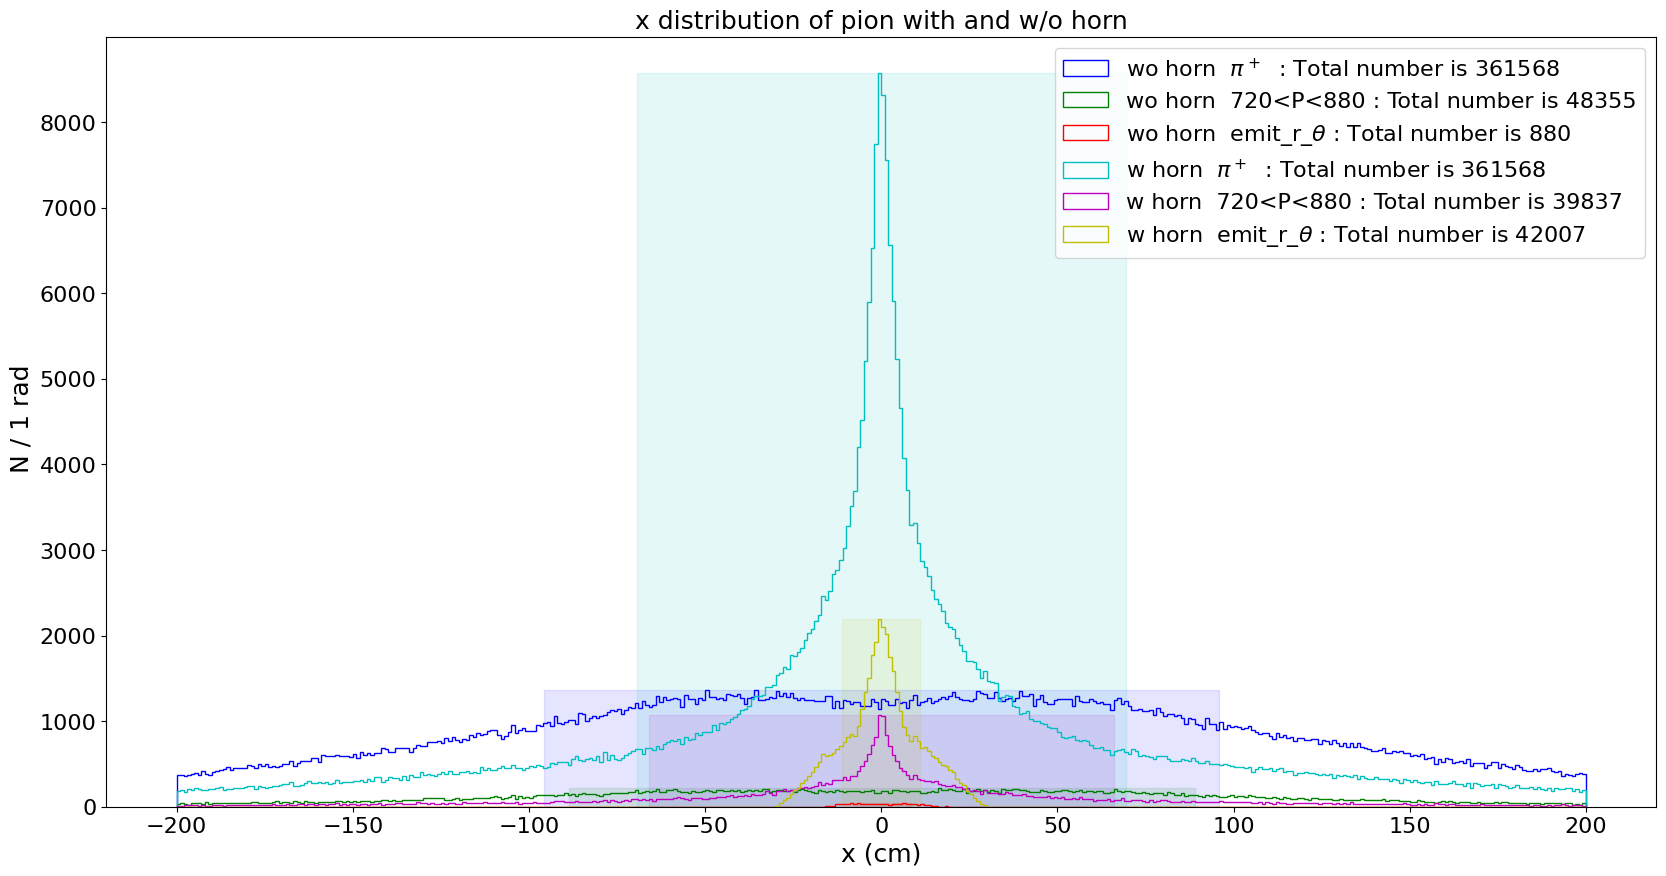

In [13]:
bin_width = 1
bin_x = bin_gen_1D(-200, 200, bin_width)
  
figsize = (20,10)
xlabel = fr'x (cm)'
ylabel = fr' N / {bin_width} rad'
title = 'x distribution of pion with and w/o horn'
save_name = image_path +f'x_dis.png'
fit = 0.68 # 68% of the data
plotting_1D_hist(x_s_c, bin_x, figsize, xlabel, ylabel, save_name, title, 
                 colors, fit, file_names, cut_name_list)

## 2D plotting

All plots any two quanities with different cuts and files, with gaussian fit

### P-theta heat map


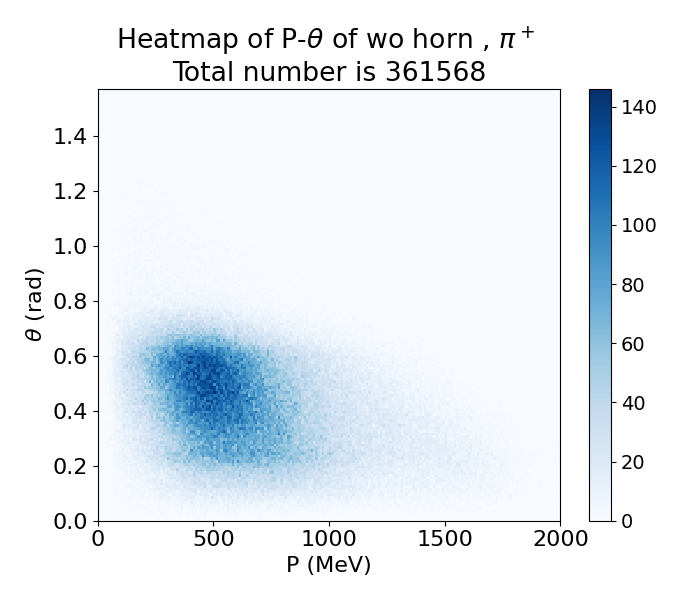
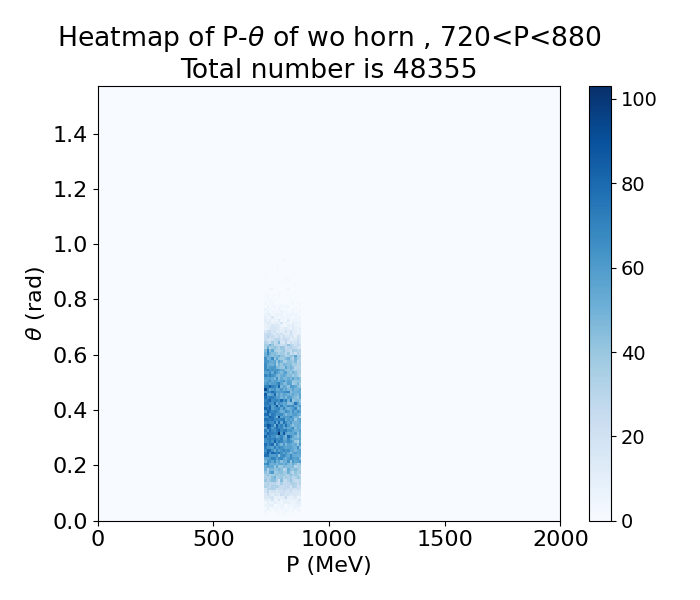
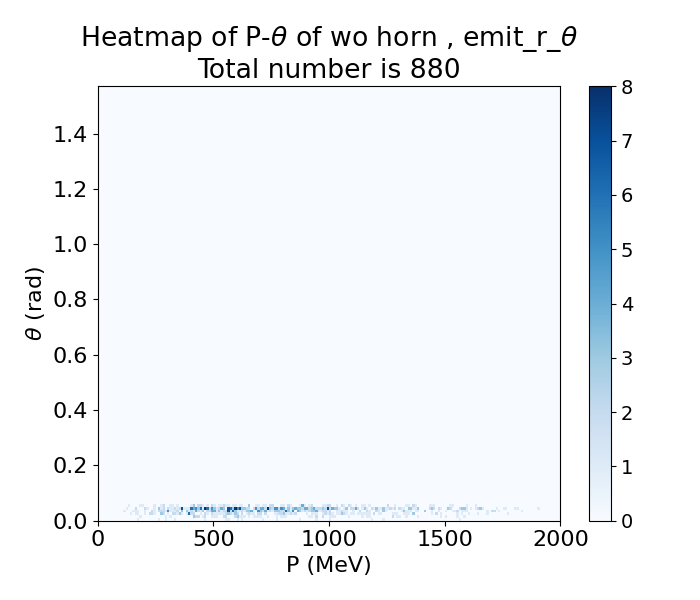
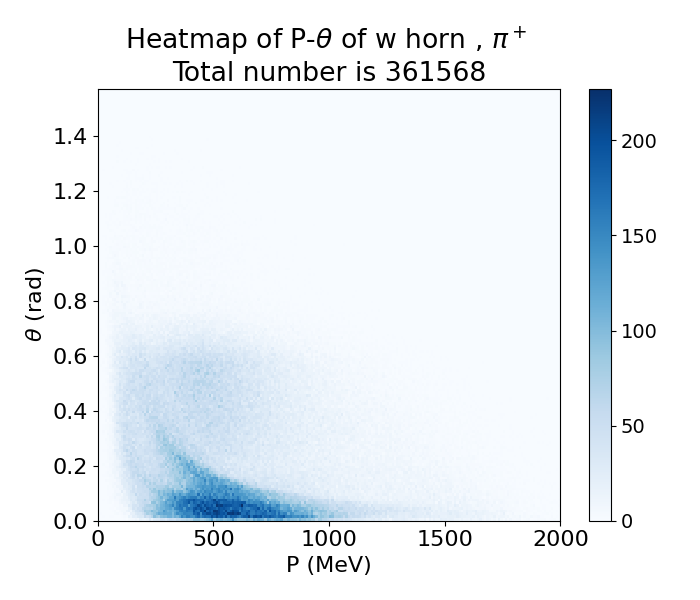
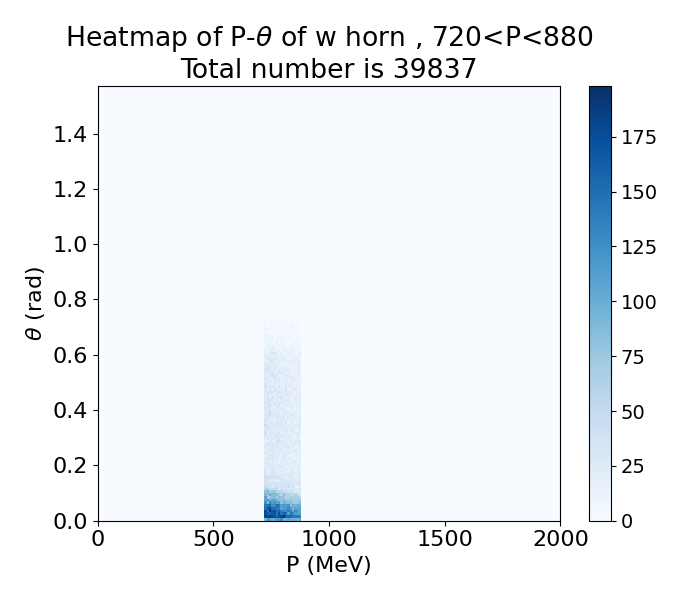
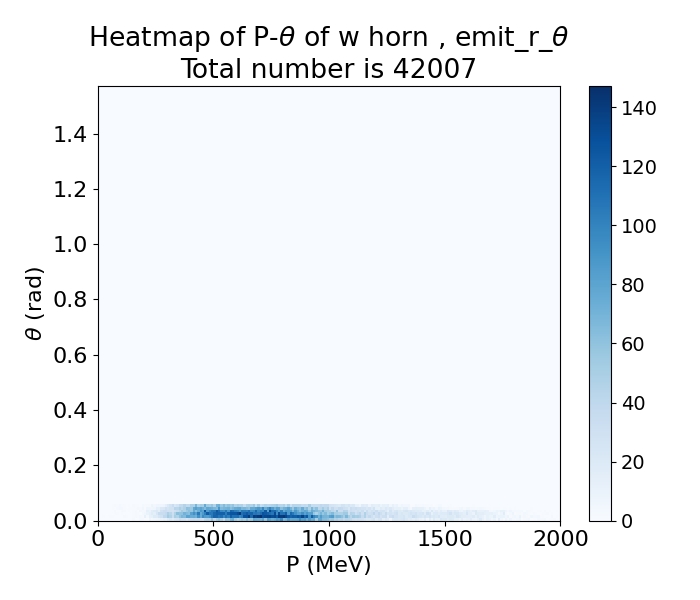

In [14]:
bin_min, bin_max, bin_width = 0, 2000, 10
bin_min2, bin_max2, bin_width2 = 0, np.pi/2, 0.01
bins_P_theta = bin_gen_2D(bin_min, bin_max, bin_width, bin_min2, bin_max2, bin_width2)

xlabel = f"P (MeV)"
ylabel = fr"$\theta$ (rad)" 
title =  fr'P-$\theta$'
save_name = image_path +'P_theta' # the name of the image if you save it.
figsize = (7,6)
cmap = "Blues"
fit=0 # 0: no gaussian fitting, 1: one std, 2: two std, ..

# That using oPlot is really nice visualising on html.
call_plotting_2D_hist_w_oPlot(P_s_c, emission_angle_s_c, bins_P_theta, figsize, xlabel, ylabel, save_name, title, 
                 cmap, fit, file_names, cut_name_list, save=True)

### x-y heat map


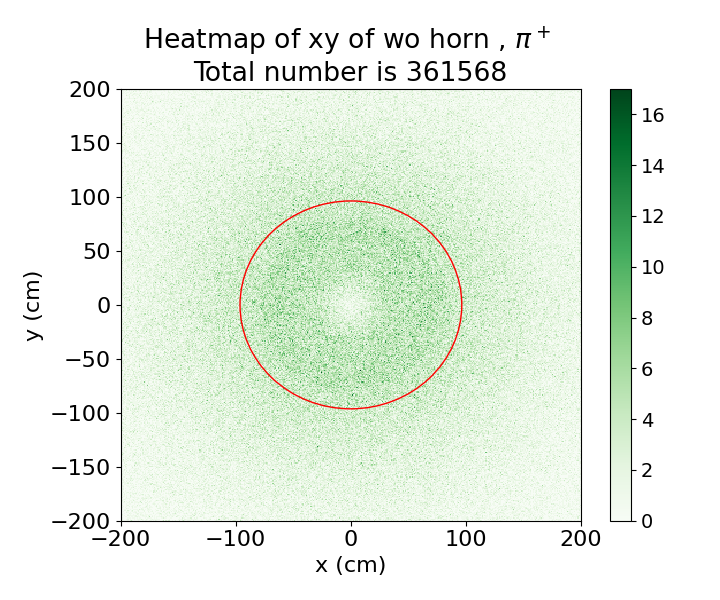
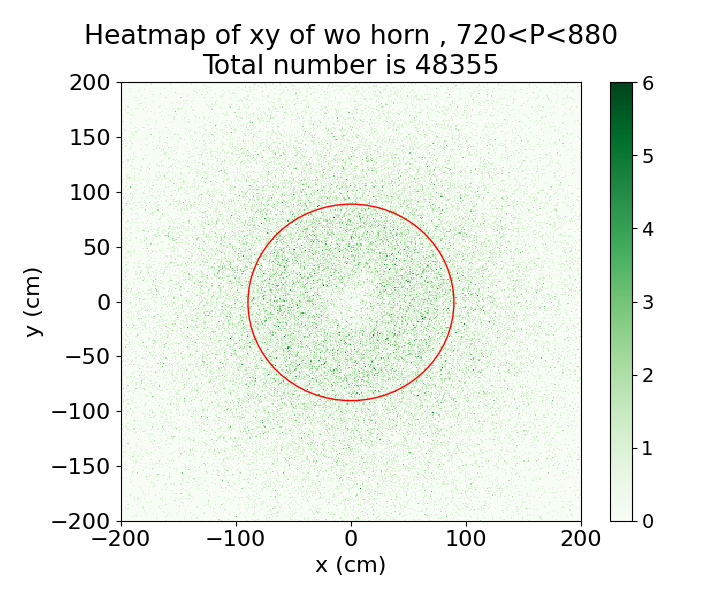
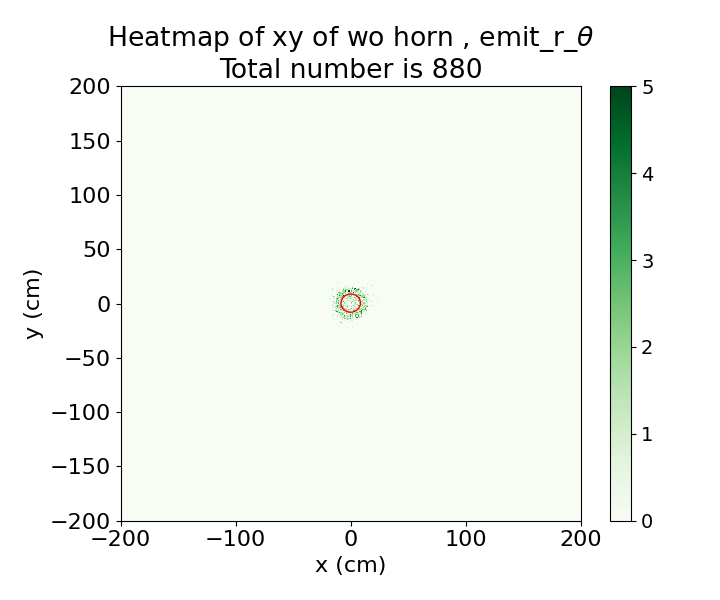
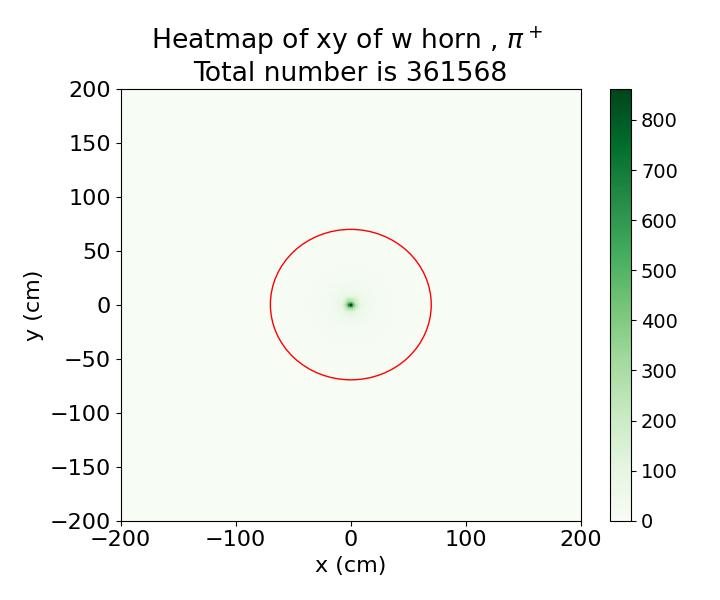
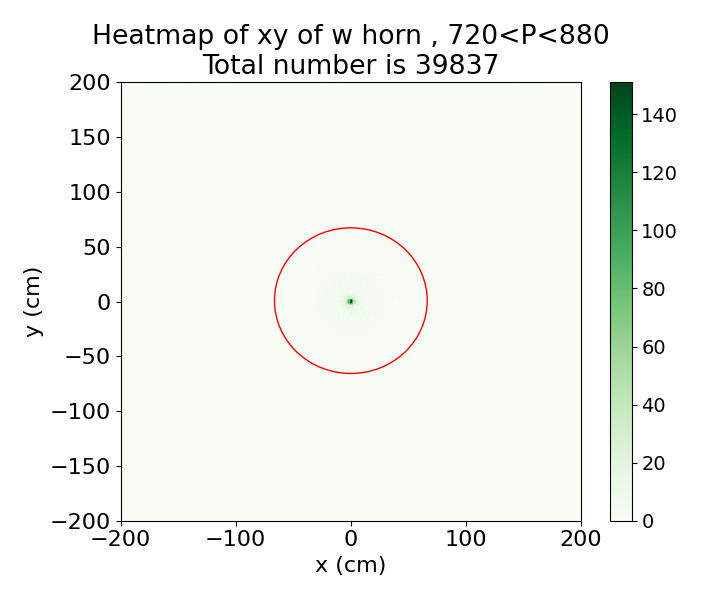
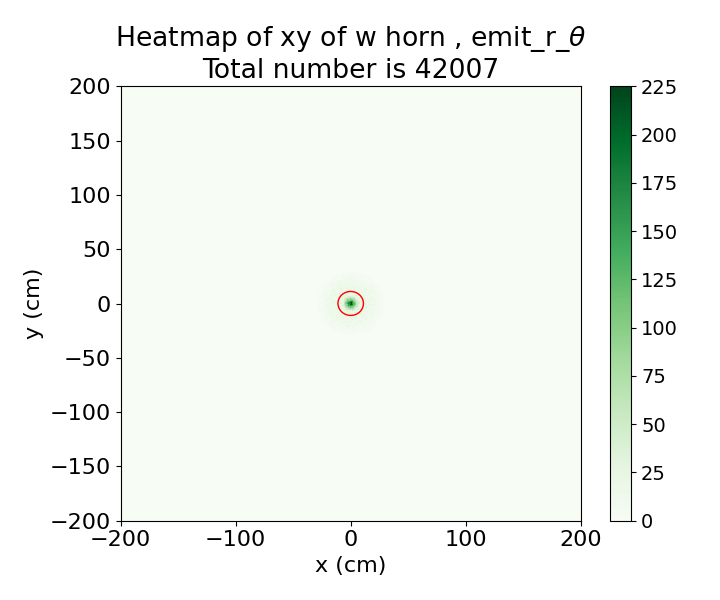

In [15]:
bin_min_x, bin_max_x, bin_width_x = -200, 200, 1
bin_min_y, bin_max_y, bin_width_y = -200, 200, 1
bins_xy_xy = bin_gen_2D(bin_min_x, bin_max_x, bin_width_x, bin_min_y, bin_max_y, bin_width_y)

xlabel = f"x (cm)"
ylabel = f"y (cm)"
title =  fr'xy'
save_name = image_path +'xy'
cmap = "Greens" #"coolwarm" # "BuPu" "YlOrRd"
figsize = (7.2,6)
fit=1 

call_plotting_2D_hist_w_oPlot(x_s_c, y_s_c, bins_xy_xy, figsize, xlabel, ylabel, save_name, title, 
                 cmap, fit, file_names, cut_name_list)

In [16]:
# !jupyter nbconvert --to html Plot_BL_files

## 3D plotting

- possibility in the future.

- using GPU